In [1]:
import numpy as np
import pandas as pd

In [2]:
def l2_norm(x, y):
    #computes the L2 norm of the difference between two vectors i.e distance
    return np.linalg.norm(x - y)

In [3]:
def closest_centroids(X, centroids):
    K = centroids.shape[0]

    k_index = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            distance_ij = l2_norm(X[i],centroids[j])
            distance.append(distance_ij)
        k_index[i] = np.argmin(distance)

    return k_index

In [4]:
def calculate_centroids(X, k_index, K):
    m, n = X.shape
    #n = features, m = training examples

    centroids = np.zeros((K, n))

    for i in range(K):
        points = X[i == k_index]
        centroids[i] = np.mean(points, axis = 0)

    return centroids

In [5]:
cache = {}
def kMeans(X, initial_centroids, max_iterations=20):
    global cache
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    k_index = np.zeros(m)

    cache = {i: [] for i in range(K)}

    print("K-means:")
    for i in range(max_iterations):
        print(f"iteration {i}/{max_iterations}")
        k_index = closest_centroids(X, centroids)
        centroids = calculate_centroids(X, k_index, K)
        for i in range(K): cache[i].append(centroids[i])

    return centroids, k_index

In [6]:
def initialize_centroids(X, K):
    row_indices = np.random.choice(X.shape[0], K, replace=False)
    return X[row_indices, :]


In [7]:
data = np.loadtxt("data/multi_class_generated.csv", delimiter=",", skiprows=1)
print(data.shape)

(1000, 3)


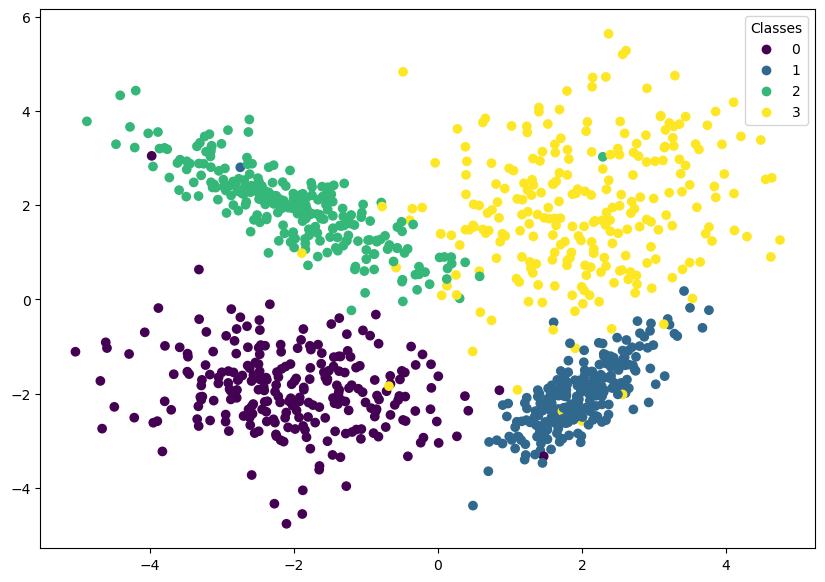

In [8]:
import matplotlib.pyplot as plt

# Separate features
feature1 = data[:,0]
feature2 = data[:,1]

# Create a scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(feature1, feature2, c=data[:,2], cmap='viridis')

# Create a legend
plt.legend(*scatter.legend_elements(), title='Classes')

# Show the plot
plt.show()

In [9]:
initial_centroids = initialize_centroids(data[:,:2],4)
print(initial_centroids)

[[-0.88697234  0.63561254]
 [ 2.98882479 -0.96962732]
 [ 2.12152929 -1.95764432]
 [-2.49229109 -1.37291357]]


In [10]:
centroids,k_index = kMeans(data[:,:2],initial_centroids)

K-means:
iteration 0/20
iteration 1/20
iteration 2/20
iteration 3/20
iteration 4/20
iteration 5/20
iteration 6/20
iteration 7/20
iteration 8/20
iteration 9/20
iteration 10/20
iteration 11/20
iteration 12/20
iteration 13/20
iteration 14/20
iteration 15/20
iteration 16/20
iteration 17/20
iteration 18/20
iteration 19/20


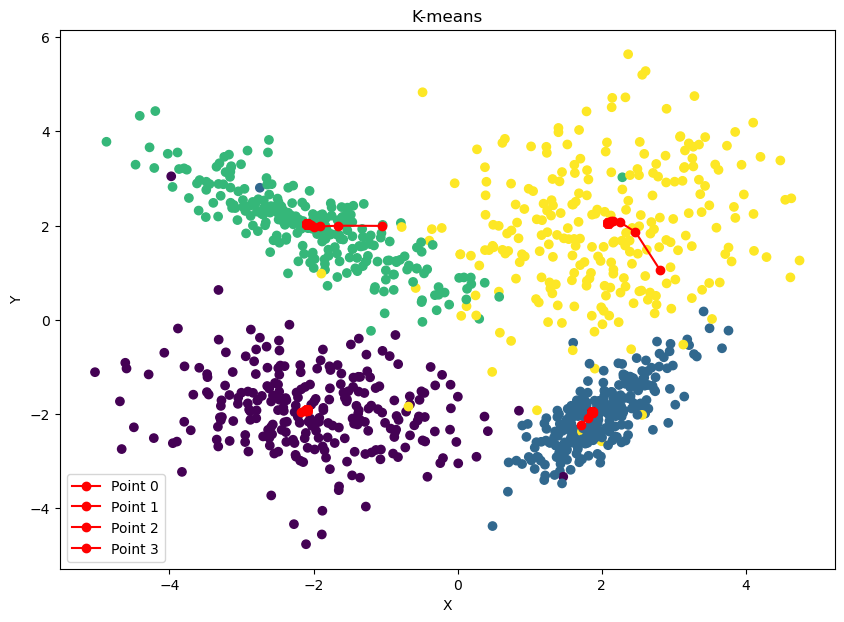

In [11]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(feature1, feature2, c=data[:,2], cmap='viridis')

# Create a legend
plt.legend(*scatter.legend_elements(), title='Classes')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X',s=50)

for key, points in cache.items():
    points = np.array(points)  # Convert list of points to numpy array for indexing
    plt.plot(points[:, 0], points[:, 1], marker='o', color = 'red',label=f'Point {key}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-means')
plt.legend()
plt.show()

# Show the plot
plt.show()

Shape: (250, 250, 3)


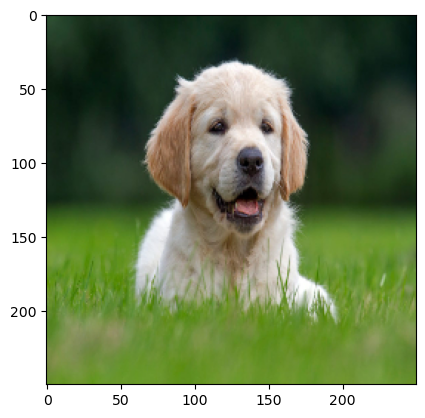

In [30]:
#image compression

#image = plt.imread('data/dog.png')
#plt.imshow(image)



import plotly.express as px
from skimage import io
import cv2

img = io.imread('data/dog.png')
print("Shape:", img.shape)
plt.imshow(img)

In [17]:
input_image = np.reshape(img, (img.shape[0] * img.shape[1], 3))

In [18]:
print(input_image)

[[ 44  79  49]
 [ 43  78  48]
 [ 43  78  48]
 ...
 [103 146  39]
 [104 147  40]
 [ 99 145  37]]


In [19]:
image_initial_centroids = initialize_centroids(input_image, 16)

In [20]:
final_centroids, final_index = kMeans(input_image, image_initial_centroids,20)

K-means:
iteration 0/20
iteration 1/20
iteration 2/20
iteration 3/20
iteration 4/20
iteration 5/20
iteration 6/20
iteration 7/20
iteration 8/20
iteration 9/20
iteration 10/20
iteration 11/20
iteration 12/20
iteration 13/20
iteration 14/20
iteration 15/20
iteration 16/20
iteration 17/20
iteration 18/20
iteration 19/20


In [21]:
final_centroids

array([[165.09756098, 156.51425213, 138.67264179],
       [120.26234177, 147.38544304,  70.95474684],
       [ 66.85834739, 103.93507589,  34.47639123],
       [110.37622861, 146.15089188,  56.30069166],
       [ 96.73379703, 138.21877964,  42.75371483],
       [ 35.75474837,  56.29765701,  34.88090947],
       [108.30593607,  88.55098935,  67.14003044],
       [193.42424242, 185.7979798 , 176.23800505],
       [137.50879397, 115.64154104,  94.19346734],
       [ 92.30362488, 139.40372464,  25.84602594],
       [ 55.10663112,  69.76407864,  47.49116961],
       [ 12.22551253,  30.823137  ,  20.28115848],
       [229.75780511, 225.82245348, 223.22894986],
       [ 24.5520225 ,  44.31105343,  28.43078088],
       [105.49950189, 147.02988643,  43.05020921],
       [136.25396825, 150.0952381 ,  96.79931973]])

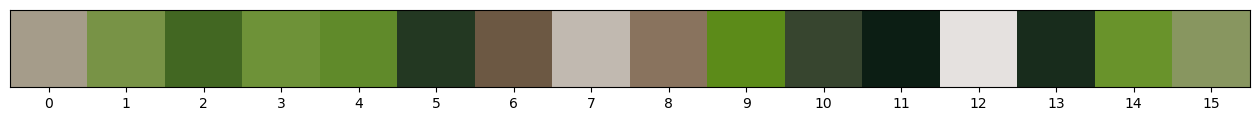

In [25]:
data_points = final_centroids/255.0
palette = np.expand_dims(data_points, axis=0)
num = np.arange(0,len(data_points))
plt.figure(figsize=(16, 16))
plt.xticks(num)
plt.yticks([])
plt.imshow(palette)

In [26]:
image_index = closest_centroids(input_image, final_centroids)

# Replace each pixel with the color of the closest centroid
pixel_value = final_centroids[image_index, :]

# Reshape image into proper dimensions
original_dimensions = np.reshape(pixel_value, image.shape)

print(original_dimensions.shape)

(250, 250, 3)


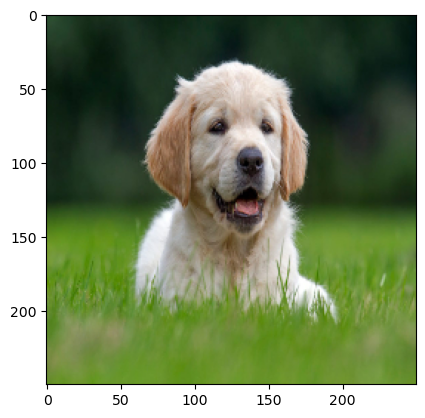

In [27]:
plt.imshow(image)

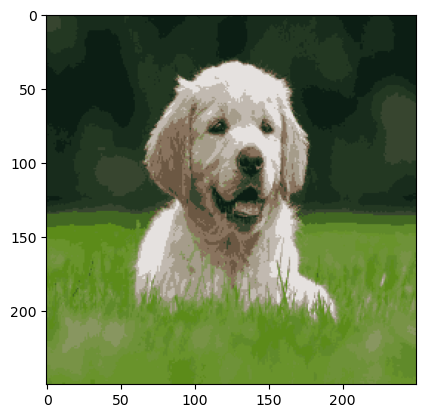

In [31]:
plt.imshow(original_dimensions/255)

In [ ]:
#need to update
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=15)

.
kmeans.fit(data[:,:2])

labels = kmeans.labels_


plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.5)

plt.show()
